### Dependencies

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
from sklearn.svm import SVC

### Original Dataset

In [81]:
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Applying Label Encoder on 'Species' Column

In [82]:
l = LabelEncoder()
l.fit(df['Species'])
df['Species'] = l.transform(df['Species'])
df_useful = df.iloc[:,1:]
df_useful

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Standardizing the Dataset

In [83]:
s = StandardScaler()
s.fit(df_useful)
df_new = pd.DataFrame(s.transform(df_useful),columns=df_useful.columns)
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.021849,1.263460,-1.341272,-1.312977,-1.224745
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,1.224745
146,0.553333,-1.281972,0.705893,0.922064,1.224745
147,0.795669,-0.124958,0.819624,1.053537,1.224745
148,0.432165,0.800654,0.933356,1.447956,1.224745


## **Distribution of Dataset before and after Standardizing Dataset**

### Sepal-Length-Cm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


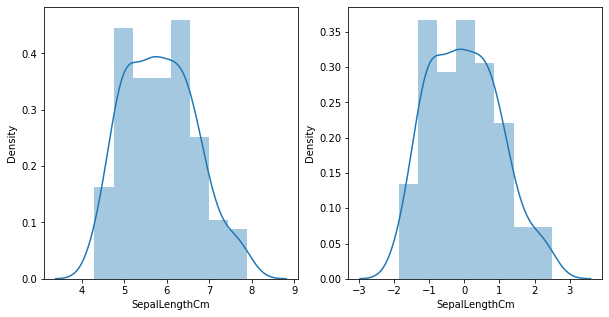

In [84]:
plt.figure(figsize = (10,5))

ax = plt.subplot(121)
sns.distplot(df['SepalLengthCm'])

bx = plt.subplot(122)
sns.distplot(df_new['SepalLengthCm'])
plt.show()

### Sepal-Width-Cm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


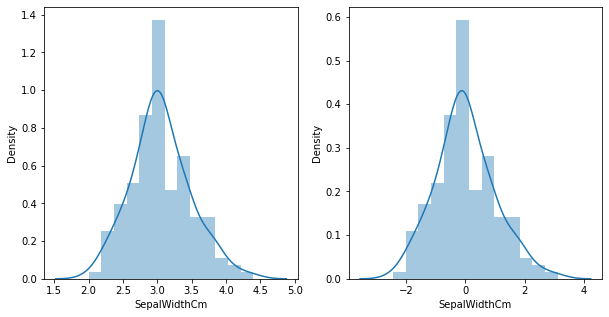

In [85]:
plt.figure(figsize = (10,5))

ax = plt.subplot(121)
sns.distplot(df['SepalWidthCm'])

bx = plt.subplot(122)
sns.distplot(df_new['SepalWidthCm'])
plt.show()

### Petal-Length-Cm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


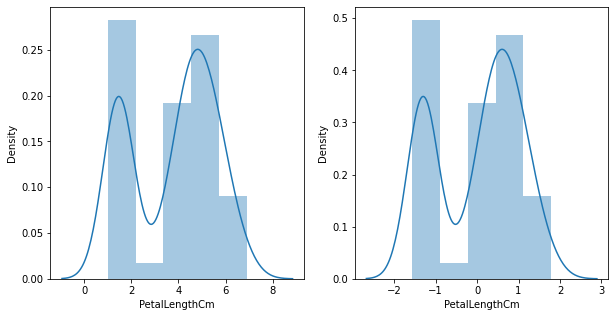

In [86]:
plt.figure(figsize = (10,5))

ax = plt.subplot(121)
sns.distplot(df['PetalLengthCm'])

bx = plt.subplot(122)
sns.distplot(df_new['PetalLengthCm'])
plt.show()

### Petal-Width-Cm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


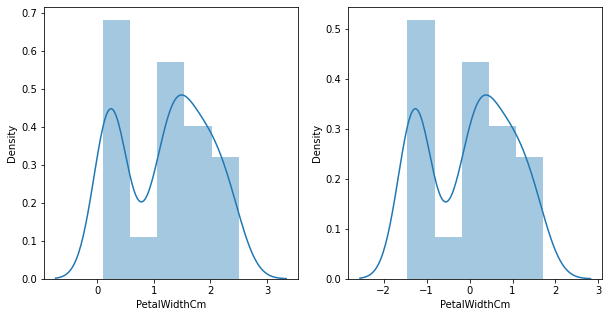

In [87]:
plt.figure(figsize = (10,5))

ax = plt.subplot(121)
sns.distplot(df['PetalWidthCm'])

bx = plt.subplot(122)
sns.distplot(df_new['PetalWidthCm'])
plt.show()

### Species

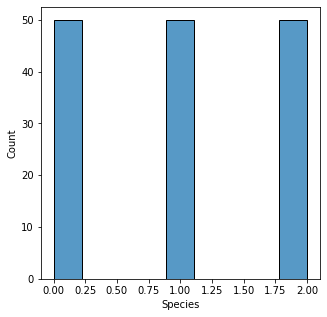

In [88]:
plt.figure(figsize = (5,5))

sns.histplot(df['Species'])

plt.show()

# **Principal Component Analysis**

### On Non-Standardized Dataset

In [89]:
pca_list2 = []
pca_new2 = []
pca_components2 = []
pca_var2 = []
pca_varp2 = []
for i in range(1,5):
  pca_list2.append((PCA(n_components=i).fit(df_useful.iloc[:,:-1])))
  pca_new2.append(pca_list2[i-1].transform(df_useful.iloc[:,:-1]))
  pca_components2.append(pca_list2[i-1].components_)
  pca_var2.append(pca_list2[i-1].explained_variance_)
  pca_varp2.append(pca_list2[i-1].explained_variance_ratio_)

varp_list2=[]
var_list2=[]
for j in range(len(pca_varp2)):
  varp_list2.append(np.sum(pca_varp2[j]))
  var_list2.append(np.sum(pca_var2[j]))

### On Standardized Dataset

In [90]:
pca_list = []
pca_new = []
pca_components = []
pca_var = []
pca_varp = []
for i in range(1,5):
  pca_list.append((PCA(n_components=i).fit(df_new.iloc[:,:-1])))
  pca_new.append(pca_list[i-1].transform(df_new.iloc[:,:-1]))
  pca_components.append(pca_list[i-1].components_)
  pca_var.append(pca_list[i-1].explained_variance_)
  pca_varp.append(pca_list[i-1].explained_variance_ratio_)

varp_list=[]
var_list=[]
for j in range(len(pca_varp)):
  varp_list.append(np.sum(pca_varp[j]))
  var_list.append(np.sum(pca_var[j]))

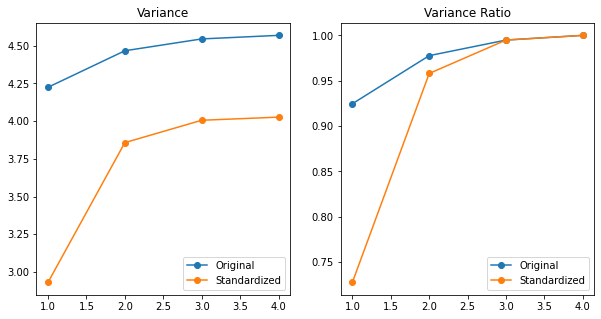

In [165]:
plt.figure(figsize = (10,5))

ax = plt.subplot(121)
plt.plot([1,2,3,4],var_list2,marker='o')
plt.plot([1,2,3,4],var_list,marker='o')
plt.legend(labels = ['Original','Standardized'])
plt.title('Variance')

bx = plt.subplot(122)
plt.plot([1,2,3,4],varp_list2,marker='o')
plt.plot([1,2,3,4],varp_list,marker='o')
plt.legend(labels = ['Original','Standardized'])
plt.title('Variance Ratio')

plt.show()

In [92]:
pca_components[1][0]

array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])

In [93]:
pca_components2[1][0]

array([ 0.36158968, -0.08226889,  0.85657211,  0.35884393])

### Correlations of Original and Standardized Features

In [94]:
standard_cor = df_new.iloc[:,:-1].corr()
standard_cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [95]:
original_cor = df.iloc[:,1:-1].corr()
original_cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Plot using Single Principal Component

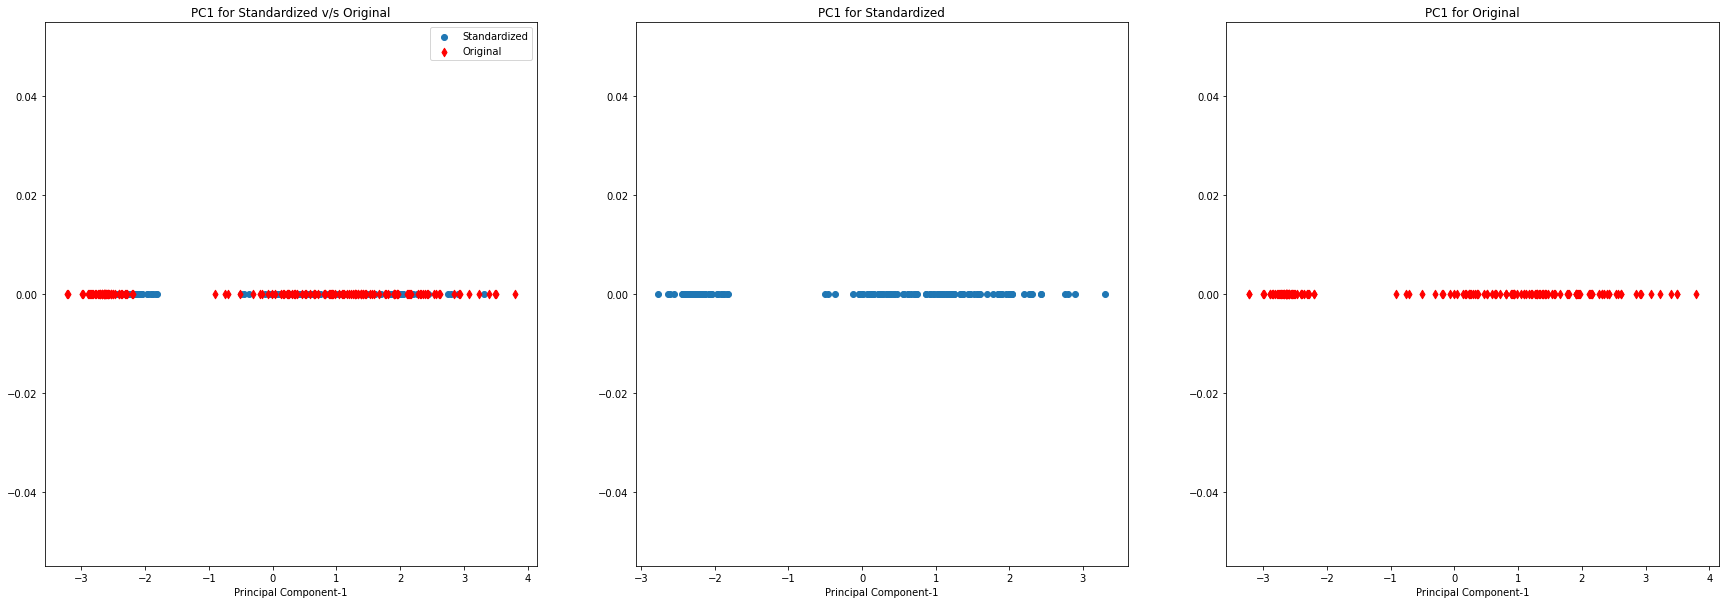

In [96]:
plt.figure(figsize = (30,10))

ax = plt.subplot(131)
plt.scatter(pca_new[0],np.zeros(pca_new[0].shape),marker='o')
plt.scatter(pca_new2[0],np.zeros(pca_new2[0].shape),marker='d',color = 'Red')
plt.legend(labels = ['Standardized','Original'])
plt.title('PC1 for Standardized v/s Original')
plt.xlabel('Principal Component-1')

bx = plt.subplot(132)
plt.scatter(pca_new[0],np.zeros(pca_new[0].shape),marker='o')
plt.title('PC1 for Standardized')
plt.xlabel('Principal Component-1')

cx = plt.subplot(133)
plt.scatter(pca_new2[0],np.zeros(pca_new2[0].shape),marker='d',color = 'Red')
plt.title('PC1 for Original')
plt.xlabel('Principal Component-1')
plt.show()

### Plot using 2 Principal Components

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

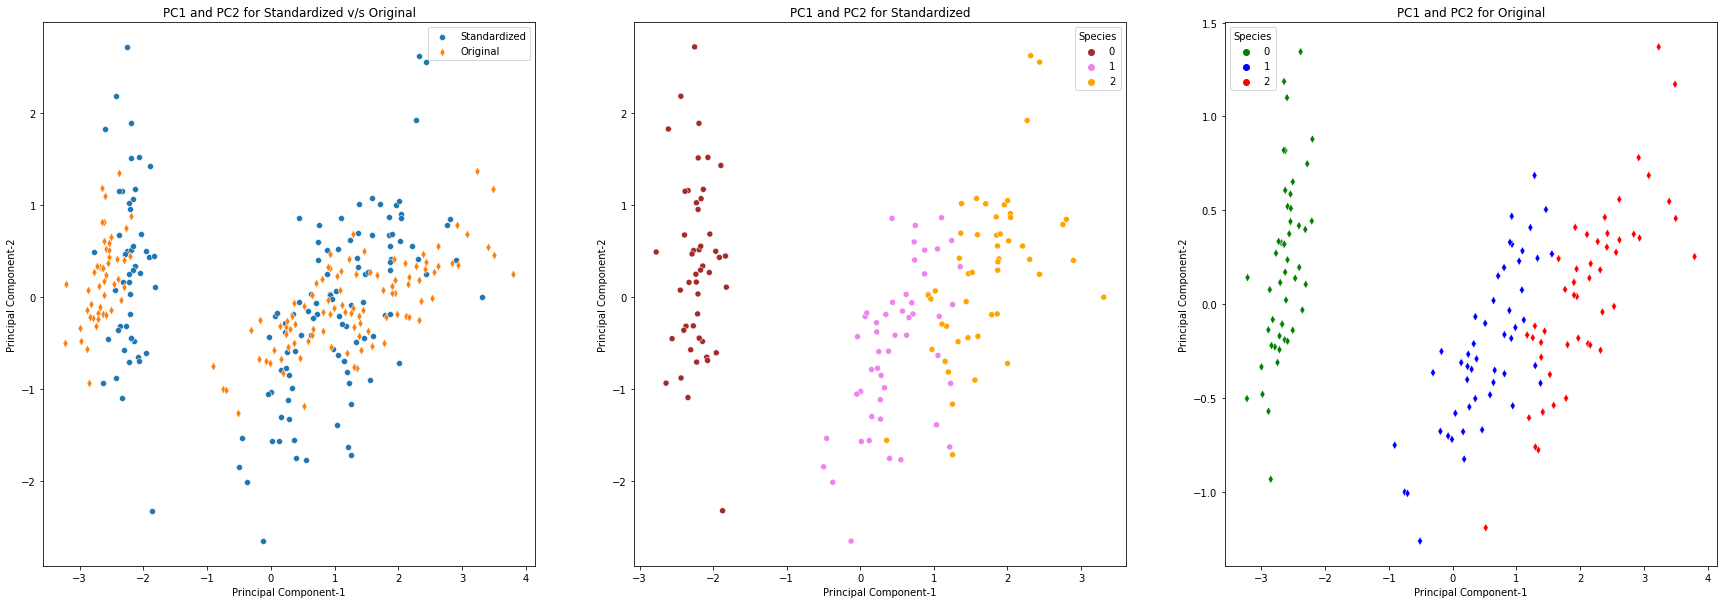

In [97]:
plt.figure(figsize = (30,10))

ax = plt.subplot(131)
sns.scatterplot(pca_new[1][:,0],pca_new[1][:,1],marker='o')
sns.scatterplot(pca_new2[1][:,0],pca_new2[1][:,1],marker='d')
plt.legend(labels = ['Standardized','Original'])
plt.title('PC1 and PC2 for Standardized v/s Original')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')

bx = plt.subplot(132)
sns.scatterplot(pca_new[1][:,0],pca_new[1][:,1],hue = df['Species'],palette=['brown','violet','orange'],marker='o')
plt.title('PC1 and PC2 for Standardized')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')

cx = plt.subplot(133)
sns.scatterplot(pca_new2[1][:,0],pca_new2[1][:,1],hue = df['Species'],palette=['green','blue','red'],marker='d')
plt.title('PC1 and PC2 for Original')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

### Plot using 3 Principal Components

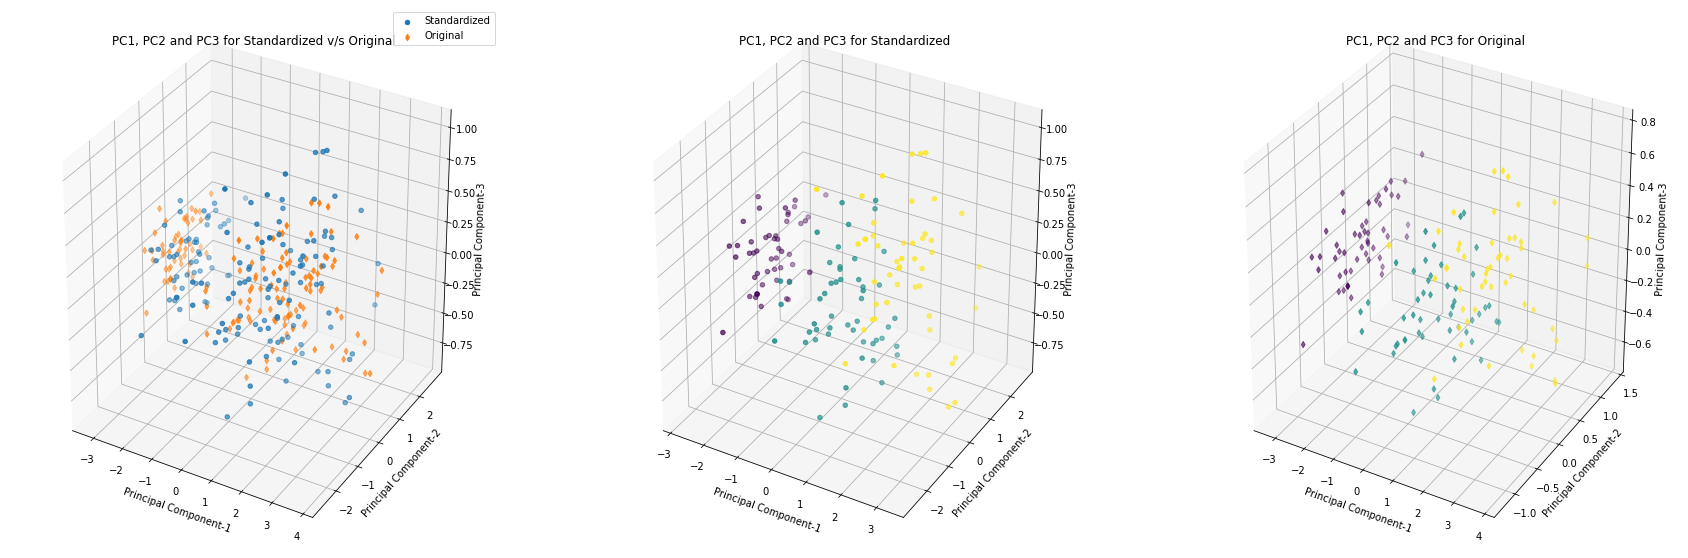

In [157]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(pca_new[2][:,0],pca_new[2][:,1],pca_new[2][:,2],marker='o')
ax.scatter3D(pca_new2[2][:,0],pca_new2[2][:,1],pca_new2[2][:,2],marker='d')
plt.legend(labels = ['Standardized','Original'])
plt.title('PC1, PC2 and PC3 for Standardized v/s Original')
ax.set_xlabel('Principal Component-1')
ax.set_ylabel('Principal Component-2')
ax.set_zlabel('Principal Component-3')

bx = fig.add_subplot(1, 3, 2, projection='3d')
bx.scatter3D(pca_new[2][:,0],pca_new[2][:,1],pca_new[2][:,2],c=df['Species'],marker='o')
plt.title('PC1, PC2 and PC3 for Standardized')
bx.set_xlabel('Principal Component-1')
bx.set_ylabel('Principal Component-2')
bx.set_zlabel('Principal Component-3')

cx = fig.add_subplot(1, 3, 3, projection='3d')
cx.scatter3D(pca_new2[2][:,0],pca_new2[2][:,1],pca_new2[2][:,2],c=df['Species'],marker='d')
plt.title('PC1, PC2 and PC3 for Original')
cx.set_xlabel('Principal Component-1')
cx.set_ylabel('Principal Component-2')
cx.set_zlabel('Principal Component-3')

plt.show()

# **Linear Discriminant Analysis**

### On Non-Standardized Dataset

In [99]:
lda_list2 = []
lda_new2 = []
lda_components2 = []
lda_var2 = []
lda_varp2 = []
for i in range(1,5):
  lda_list2.append((LDA(n_components=i,tol=0.0,store_covariance=True).fit(df_useful.iloc[:,:-1],df_useful.iloc[:,-1].astype('int'))))
  lda_new2.append(lda_list2[i-1].transform(df_useful.iloc[:,:-1]))
  lda_components2.append(lda_list2[i-1].coef_)
  lda_var2.append(lda_list2[i-1].covariance_[i-1,i-1])
  lda_varp2.append(lda_list2[i-1].explained_variance_ratio_)

varp_lda2=[]
var_lda2=[]
for j in range(len(lda_varp2)):
  varp_lda2.append(np.sum(lda_varp2[j]))
  var_lda2.append(np.sum(lda_var2[j]))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > m

### On Standardized Dataset

In [100]:
lda_list = []
lda_new = []
lda_components = []
lda_var = []
lda_varp = []
for i in range(1,5):
  lda_list.append((LDA(n_components=i,tol=0.0,store_covariance=True).fit(df_new.iloc[:,:-1],df_new.iloc[:,-1].astype('int'))))
  lda_new.append(lda_list[i-1].transform(df_new.iloc[:,:-1]))
  lda_components.append(lda_list[i-1].coef_)
  lda_var.append(lda_list[i-1].covariance_[i-1,i-1])
  lda_varp.append(lda_list[i-1].explained_variance_ratio_)

varp_lda=[]
var_lda=[]
for j in range(len(lda_varp)):
  varp_lda.append(np.sum(lda_varp[j]))
  var_lda.append(np.sum(lda_var[j]))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > m

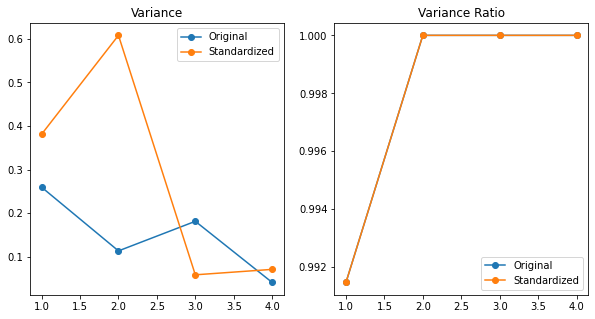

In [164]:
plt.figure(figsize = (10,5))

ax = plt.subplot(121)
plt.plot([1,2,3,4],var_lda2,marker='o')
plt.plot([1,2,3,4],var_lda,marker='o')
plt.legend(labels = ['Original','Standardized'])
plt.title('Variance')

bx = plt.subplot(122)
plt.plot([1,2,3,4],varp_lda2,marker='o')
plt.plot([1,2,3,4],varp_lda,marker='o')
plt.legend(labels = ['Original','Standardized'])
plt.title('Variance Ratio')

plt.show()

### Plot using Single Linear Discriminant

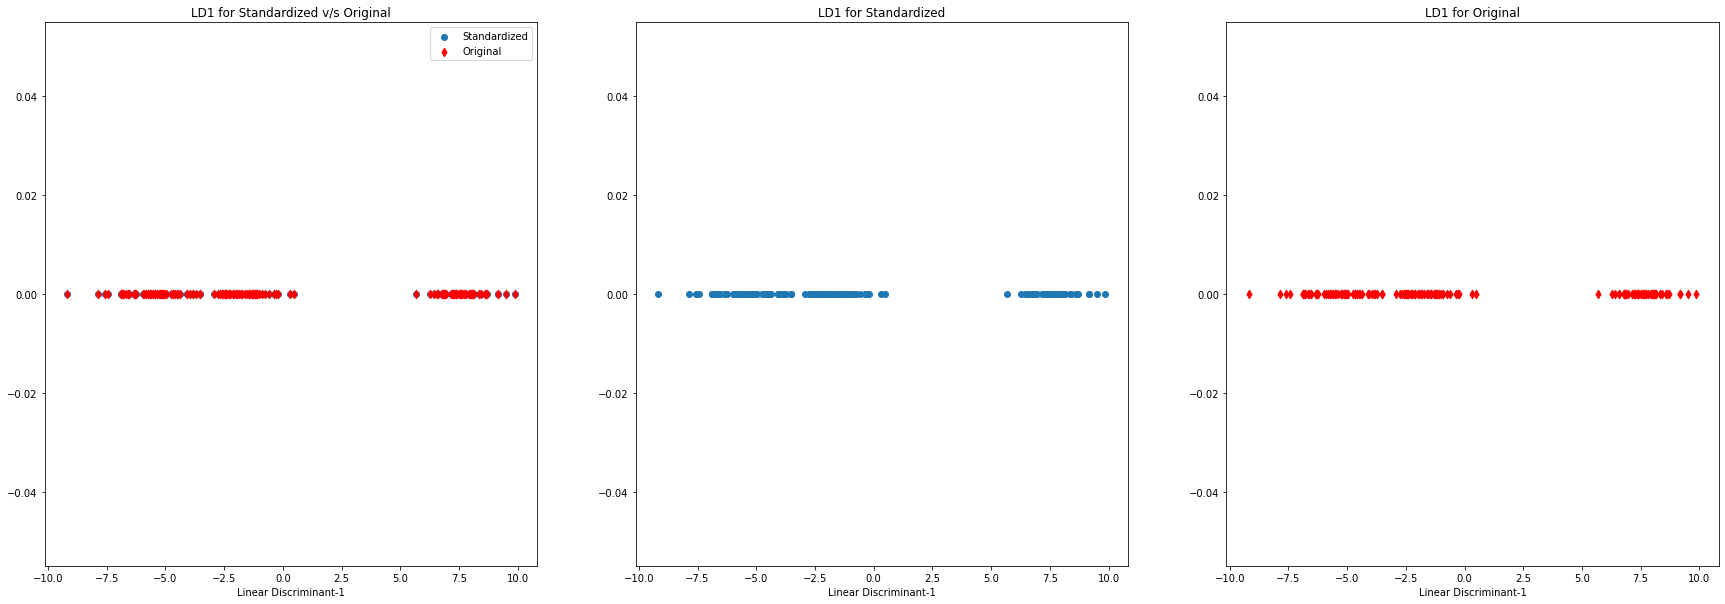

In [102]:
plt.figure(figsize = (30,10))

ax = plt.subplot(131)
plt.scatter(lda_new[0],np.zeros(lda_new[0].shape),marker='o')
plt.scatter(lda_new2[0],np.zeros(lda_new2[0].shape),marker='d',color = 'Red')
plt.legend(labels = ['Standardized','Original'])
plt.title('LD1 for Standardized v/s Original')
plt.xlabel('Linear Discriminant-1')

bx = plt.subplot(132)
plt.scatter(lda_new[0],np.zeros(lda_new[0].shape),marker='o')
plt.title('LD1 for Standardized')
plt.xlabel('Linear Discriminant-1')

cx = plt.subplot(133)
plt.scatter(lda_new2[0],np.zeros(lda_new2[0].shape),marker='d',color = 'Red')
plt.title('LD1 for Original')
plt.xlabel('Linear Discriminant-1')

plt.show()

### Plot using 2 Linear Discriminants

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

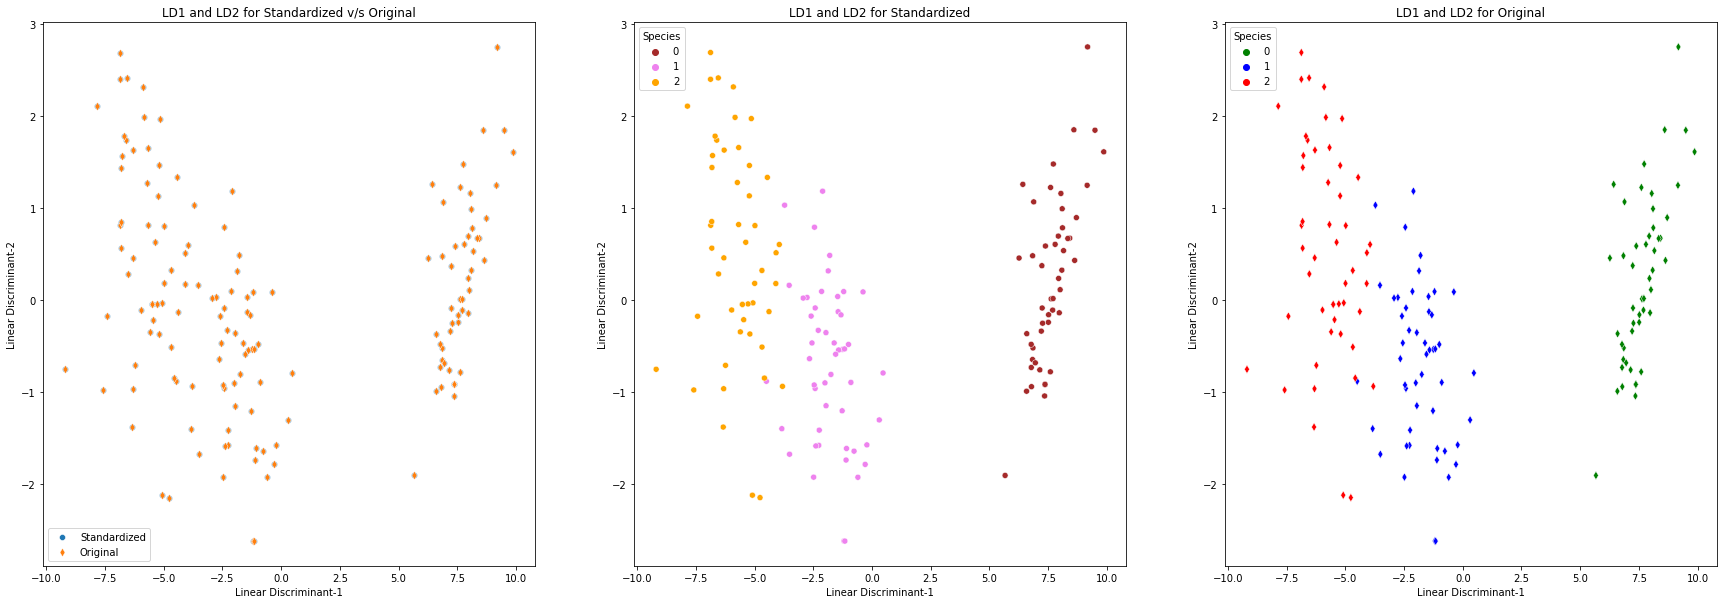

In [103]:
plt.figure(figsize = (30,10))

ax = plt.subplot(131)
sns.scatterplot(lda_new[1][:,0],lda_new[1][:,1],marker='o')
sns.scatterplot(lda_new2[1][:,0],lda_new2[1][:,1],marker='d')
plt.legend(labels = ['Standardized','Original'])
plt.title('LD1 and LD2 for Standardized v/s Original')
plt.xlabel('Linear Discriminant-1')
plt.ylabel('Linear Discriminant-2')

bx = plt.subplot(132)
sns.scatterplot(lda_new[1][:,0],lda_new[1][:,1],hue = df['Species'],palette=['brown','violet','orange'],marker='o')
plt.title('LD1 and LD2 for Standardized')
plt.xlabel('Linear Discriminant-1')
plt.ylabel('Linear Discriminant-2')

cx = plt.subplot(133)
sns.scatterplot(lda_new2[1][:,0],lda_new2[1][:,1],hue = df['Species'],palette=['green','blue','red'],marker='d')
plt.title('LD1 and LD2 for Original')
plt.xlabel('Linear Discriminant-1')
plt.ylabel('Linear Discriminant-2')

plt.show()

# **Bayesian Classification Task (Taking 100 different train_test_splits)**

### On Original Dataset

In [104]:
splits = []
for i in range(1,100):
  splits.append(list(train_test_split(df_useful.iloc[:,:-1],df_useful.iloc[:,-1],test_size = i/100)))

ga=[]

for i in range(0,99):
  g1 = GaussianNB().fit(splits[i][0],splits[i][2])
  ga.append(g1.score(splits[i][1],splits[i][3])*100)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)


### Bayes Classification on Transformed Non-Standardized/Standardized Dataset using 1 or 2 Principal Components

In [105]:
splitsp11 = []
splitsp12 = []
splitsp21 = []
splitsp22 = []
for i in range(1,100):
  splitsp11.append(list(train_test_split(pca_new[0],df.iloc[:,-1].to_numpy(),test_size = i/100)))
  splitsp12.append(list(train_test_split(pca_new[1],df.iloc[:,-1].to_numpy(),test_size = i/100)))
  splitsp21.append(list(train_test_split(pca_new2[0],df.iloc[:,-1].to_numpy(),test_size = i/100)))
  splitsp22.append(list(train_test_split(pca_new2[1],df.iloc[:,-1].to_numpy(),test_size = i/100)))

gap11=[]
gap12=[]
gap21=[]
gap22=[]

for i in range(0,99):
  g1p1 = GaussianNB().fit(splitsp11[i][0],splitsp11[i][2])
  g1p2 = GaussianNB().fit(splitsp12[i][0],splitsp12[i][2])
  g2p1 = GaussianNB().fit(splitsp21[i][0],splitsp21[i][2])
  g2p2 = GaussianNB().fit(splitsp22[i][0],splitsp22[i][2])
  gap11.append(g1p1.score(splitsp11[i][1],splitsp11[i][3])*100)
  gap12.append(g1p2.score(splitsp12[i][1],splitsp12[i][3])*100)
  gap21.append(g2p1.score(splitsp21[i][1],splitsp21[i][3])*100)
  gap22.append(g2p2.score(splitsp22[i][1],splitsp22[i][3])*100)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/skl

### Bayes Classification on Transformed Non-Standardized/Standardized Dataset using 1 or 2 Linear Discriminants

In [106]:
splitsl11 = []
splitsl12 = []
splitsl21 = []
splitsl22 = []
for i in range(1,100):
  splitsl11.append(list(train_test_split(lda_new[0],df.iloc[:,-1].to_numpy(),test_size = i/100)))
  splitsl12.append(list(train_test_split(lda_new[1],df.iloc[:,-1].to_numpy(),test_size = i/100)))
  splitsl21.append(list(train_test_split(lda_new2[0],df.iloc[:,-1].to_numpy(),test_size = i/100)))
  splitsl22.append(list(train_test_split(lda_new2[1],df.iloc[:,-1].to_numpy(),test_size = i/100)))

gal11=[]
gal12=[]
gal21=[]
gal22=[]

for i in range(0,99):
  g1l1 = GaussianNB().fit(splitsl11[i][0],splitsl11[i][2])
  g1l2 = GaussianNB().fit(splitsl12[i][0],splitsl12[i][2])
  g2l1 = GaussianNB().fit(splitsl21[i][0],splitsl21[i][2])
  g2l2 = GaussianNB().fit(splitsl22[i][0],splitsl22[i][2])
  gal11.append(g1l1.score(splitsl11[i][1],splitsl11[i][3])*100)
  gal12.append(g1l2.score(splitsl12[i][1],splitsl12[i][3])*100)
  gal21.append(g2l1.score(splitsl21[i][1],splitsl21[i][3])*100)
  gal22.append(g2l2.score(splitsl22[i][1],splitsl22[i][3])*100)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/

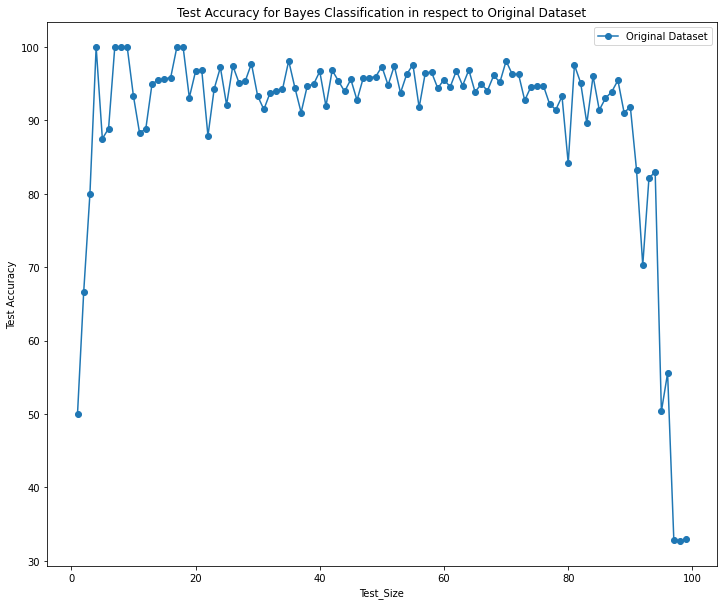

In [107]:
plt.figure(figsize = (12,10))
plt.plot([i for i in range (1,100)],ga,marker='o')
plt.legend(labels = ['Original Dataset'])
plt.title('Test Accuracy for Bayes Classification in respect to Original Dataset')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')
plt.show()

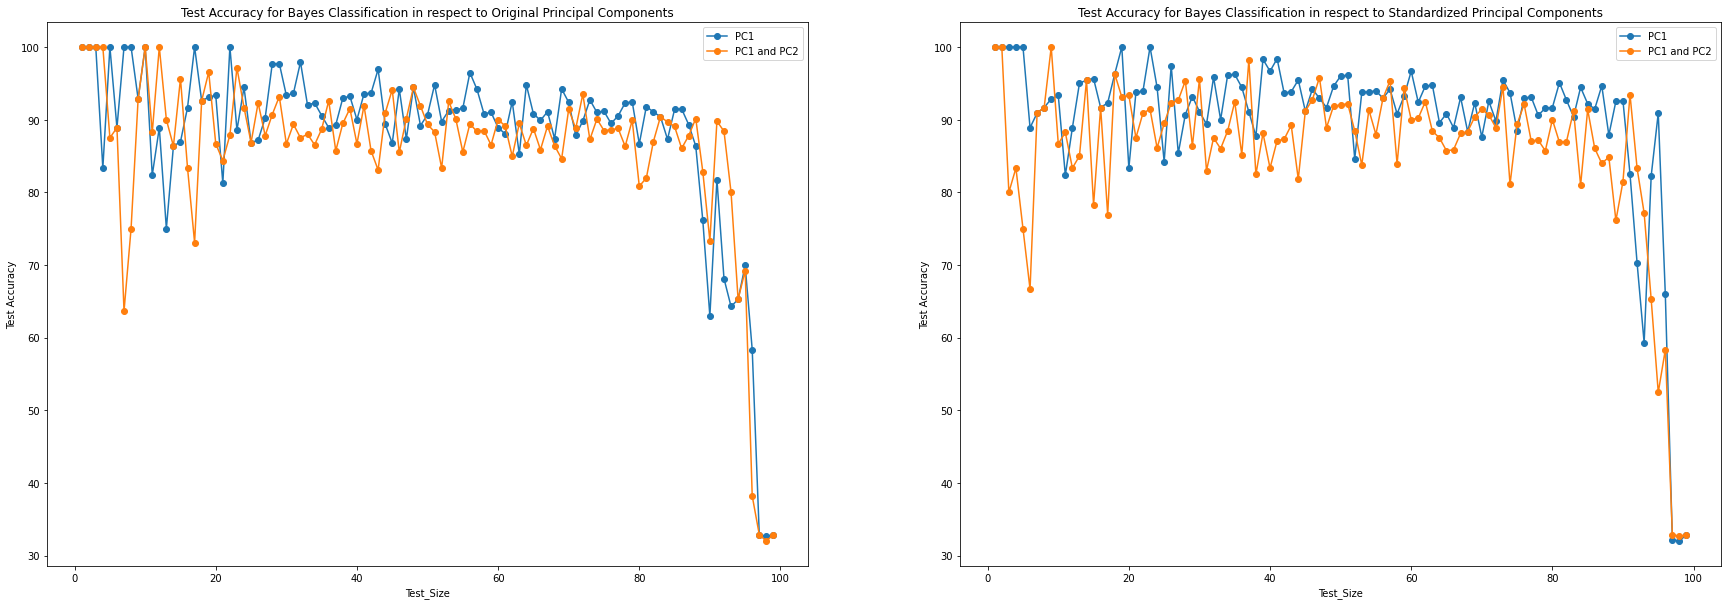

In [108]:
plt.figure(figsize = (30,10))

ax = plt.subplot(121)
plt.plot([i for i in range (1,100)],gap11,marker='o')
plt.plot([i for i in range (1,100)],gap12,marker='o')
plt.legend(labels = ['PC1', 'PC1 and PC2'])
plt.title('Test Accuracy for Bayes Classification in respect to Original Principal Components')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

bx = plt.subplot(122)
plt.plot([i for i in range (1,100)],gap21,marker='o')
plt.plot([i for i in range (1,100)],gap22,marker='o')
plt.legend(labels = ['PC1', 'PC1 and PC2'])
plt.title('Test Accuracy for Bayes Classification in respect to Standardized Principal Components')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

plt.show()

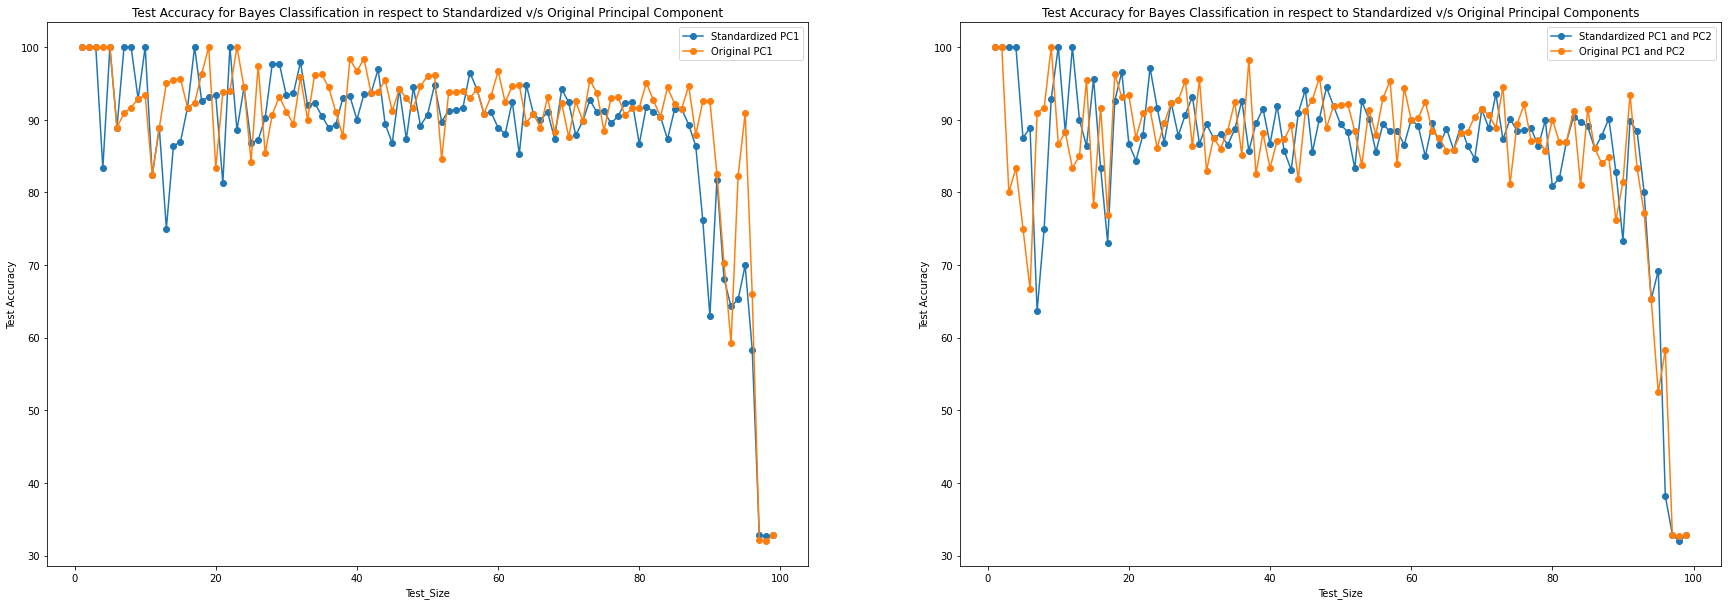

In [167]:
plt.figure(figsize = (30,10))

ax = plt.subplot(121)
plt.plot([i for i in range (1,100)],gap11,marker='o')
plt.plot([i for i in range (1,100)],gap21,marker='o')
plt.legend(labels = ['Standardized PC1', 'Original PC1'])
plt.title('Test Accuracy for Bayes Classification in respect to Standardized v/s Original Principal Component')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

bx = plt.subplot(122)
plt.plot([i for i in range (1,100)],gap12,marker='o')
plt.plot([i for i in range (1,100)],gap22,marker='o')
plt.legend(labels = ['Standardized PC1 and PC2', 'Original PC1 and PC2'])
plt.title('Test Accuracy for Bayes Classification in respect to Standardized v/s Original Principal Components')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

plt.show()

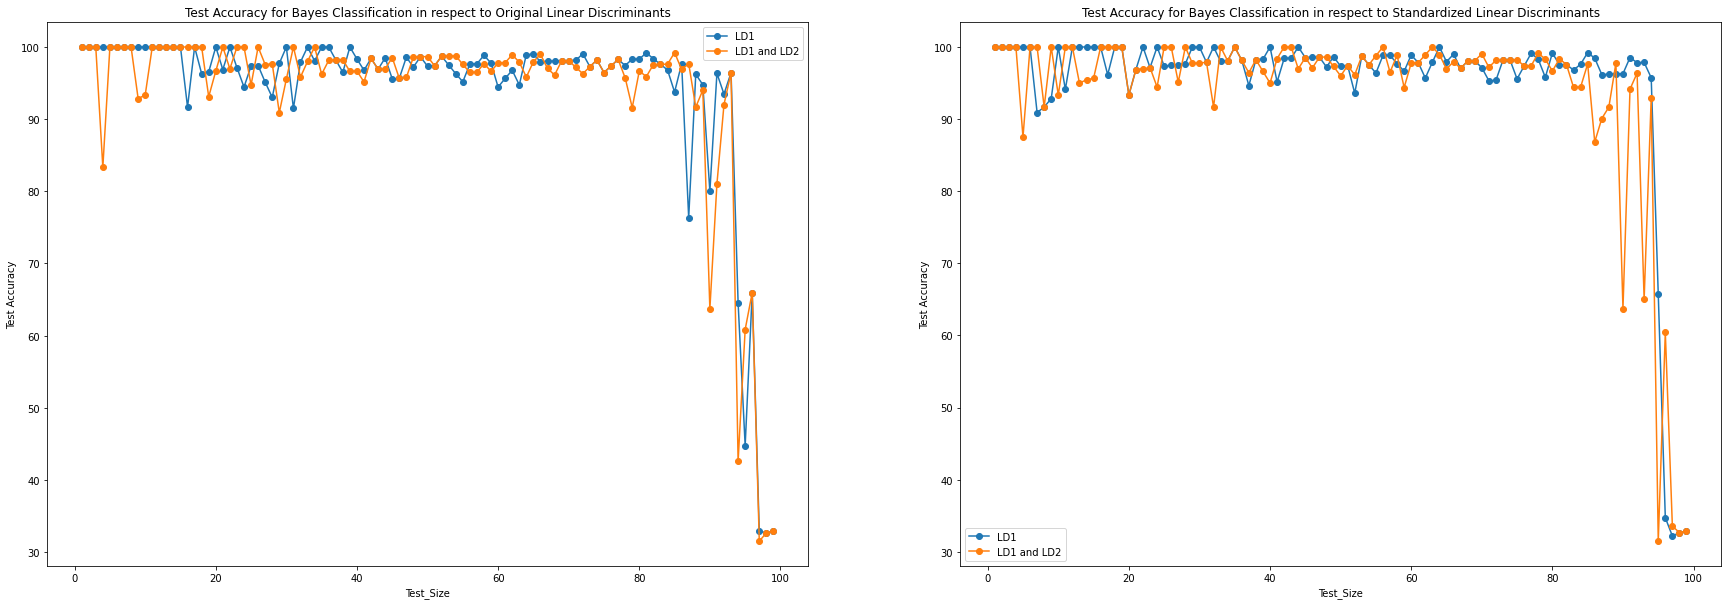

In [110]:
plt.figure(figsize = (30,10))

ax = plt.subplot(121)
plt.plot([i for i in range (1,100)],gal11,marker='o')
plt.plot([i for i in range (1,100)],gal12,marker='o')
plt.legend(labels = ['LD1', 'LD1 and LD2'])
plt.title('Test Accuracy for Bayes Classification in respect to Original Linear Discriminants')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

bx = plt.subplot(122)
plt.plot([i for i in range (1,100)],gal21,marker='o')
plt.plot([i for i in range (1,100)],gal22,marker='o')
plt.legend(labels = ['LD1', 'LD1 and LD2'])
plt.title('Test Accuracy for Bayes Classification in respect to Standardized Linear Discriminants')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

plt.show()

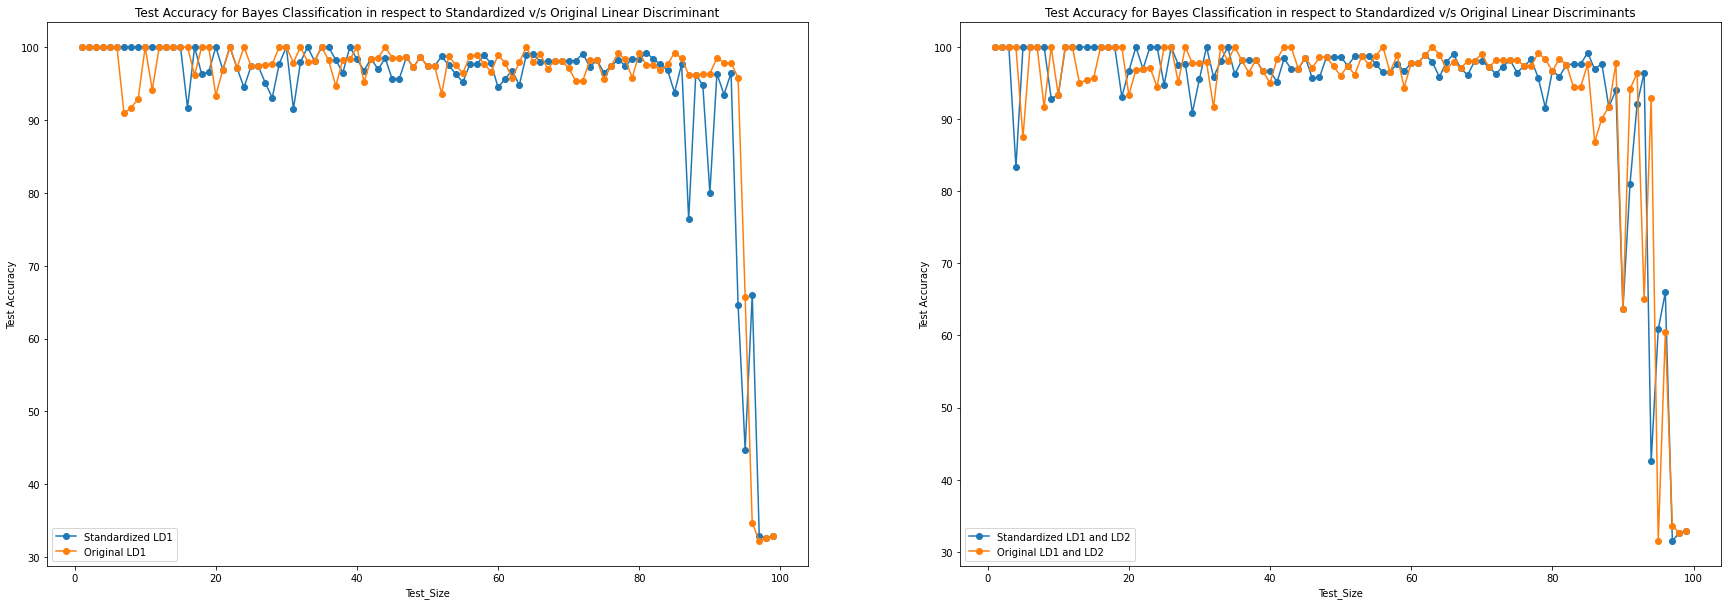

In [168]:
plt.figure(figsize = (30,10))

ax = plt.subplot(121)
plt.plot([i for i in range (1,100)],gal11,marker='o')
plt.plot([i for i in range (1,100)],gal21,marker='o')
plt.legend(labels = ['Standardized LD1', 'Original LD1'])
plt.title('Test Accuracy for Bayes Classification in respect to Standardized v/s Original Linear Discriminant')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

bx = plt.subplot(122)
plt.plot([i for i in range (1,100)],gal12,marker='o')
plt.plot([i for i in range (1,100)],gal22,marker='o')
plt.legend(labels = ['Standardized LD1 and LD2', 'Original LD1 and LD2'])
plt.title('Test Accuracy for Bayes Classification in respect to Standardized v/s Original Linear Discriminants')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

plt.show()

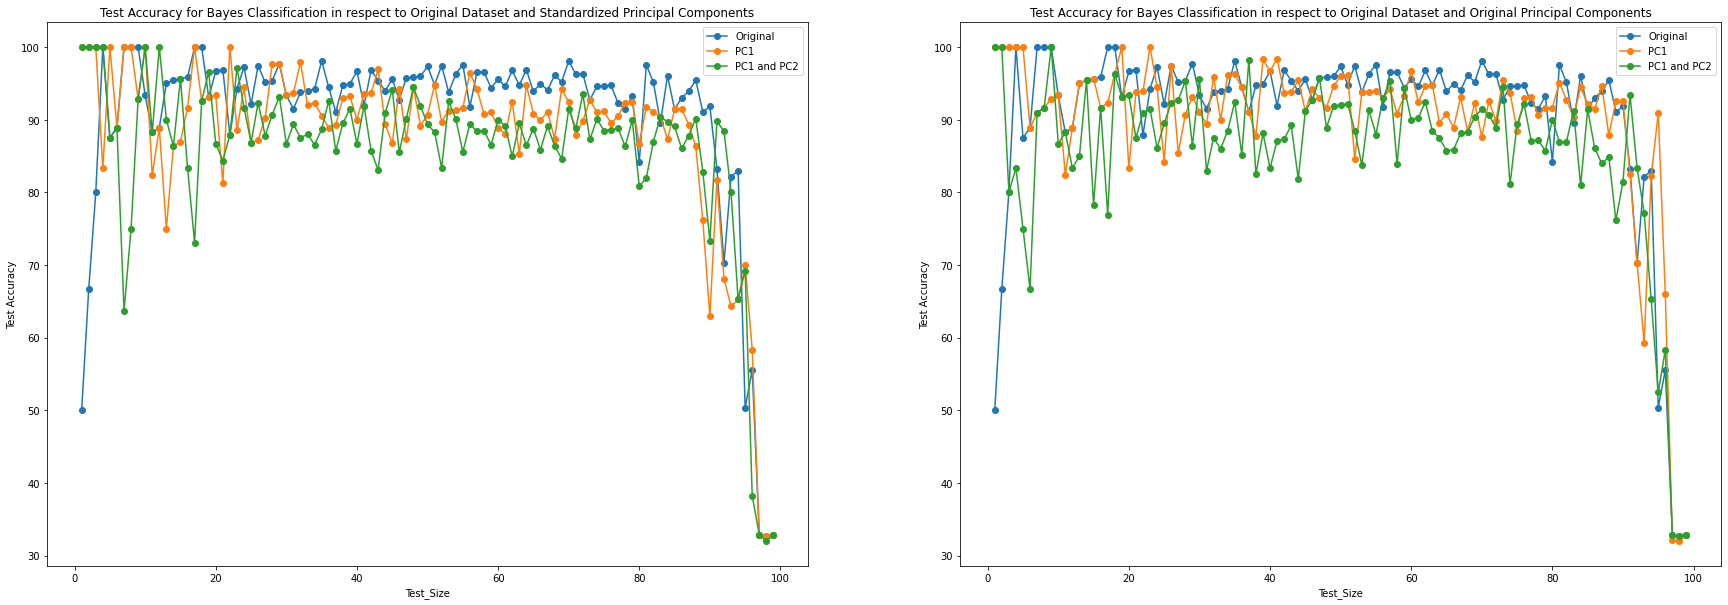

In [112]:
plt.figure(figsize = (30,10))

ax = plt.subplot(121)
plt.plot([i for i in range (1,100)],ga,marker='o')
plt.plot([i for i in range (1,100)],gap11,marker='o')
plt.plot([i for i in range (1,100)],gap12,marker='o')
plt.legend(labels = ['Original','PC1', 'PC1 and PC2'])
plt.title('Test Accuracy for Bayes Classification in respect to Original Dataset and Standardized Principal Components')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

bx = plt.subplot(122)
plt.plot([i for i in range (1,100)],ga,marker='o')
plt.plot([i for i in range (1,100)],gap21,marker='o')
plt.plot([i for i in range (1,100)],gap22,marker='o')
plt.legend(labels = ['Original','PC1', 'PC1 and PC2'])
plt.title('Test Accuracy for Bayes Classification in respect to Original Dataset and Original Principal Components')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

plt.show()

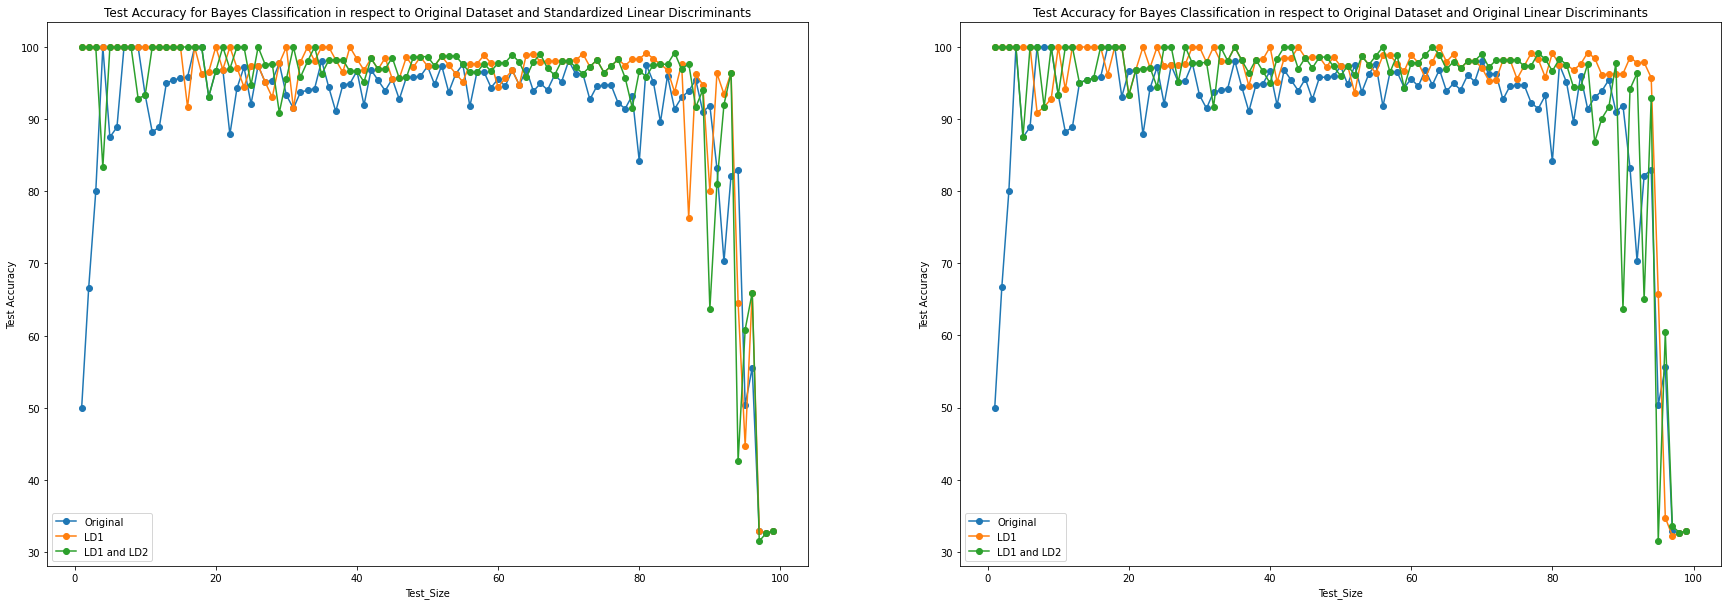

In [113]:
plt.figure(figsize = (30,10))

ax = plt.subplot(121)
plt.plot([i for i in range (1,100)],ga,marker='o')
plt.plot([i for i in range (1,100)],gal11,marker='o')
plt.plot([i for i in range (1,100)],gal12,marker='o')
plt.legend(labels = ['Original','LD1', 'LD1 and LD2'])
plt.title('Test Accuracy for Bayes Classification in respect to Original Dataset and Standardized Linear Discriminants')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

bx = plt.subplot(122)
plt.plot([i for i in range (1,100)],ga,marker='o')
plt.plot([i for i in range (1,100)],gal21,marker='o')
plt.plot([i for i in range (1,100)],gal22,marker='o')
plt.legend(labels = ['Original','LD1', 'LD1 and LD2'])
plt.title('Test Accuracy for Bayes Classification in respect to Original Dataset and Original Linear Discriminants')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

plt.show()

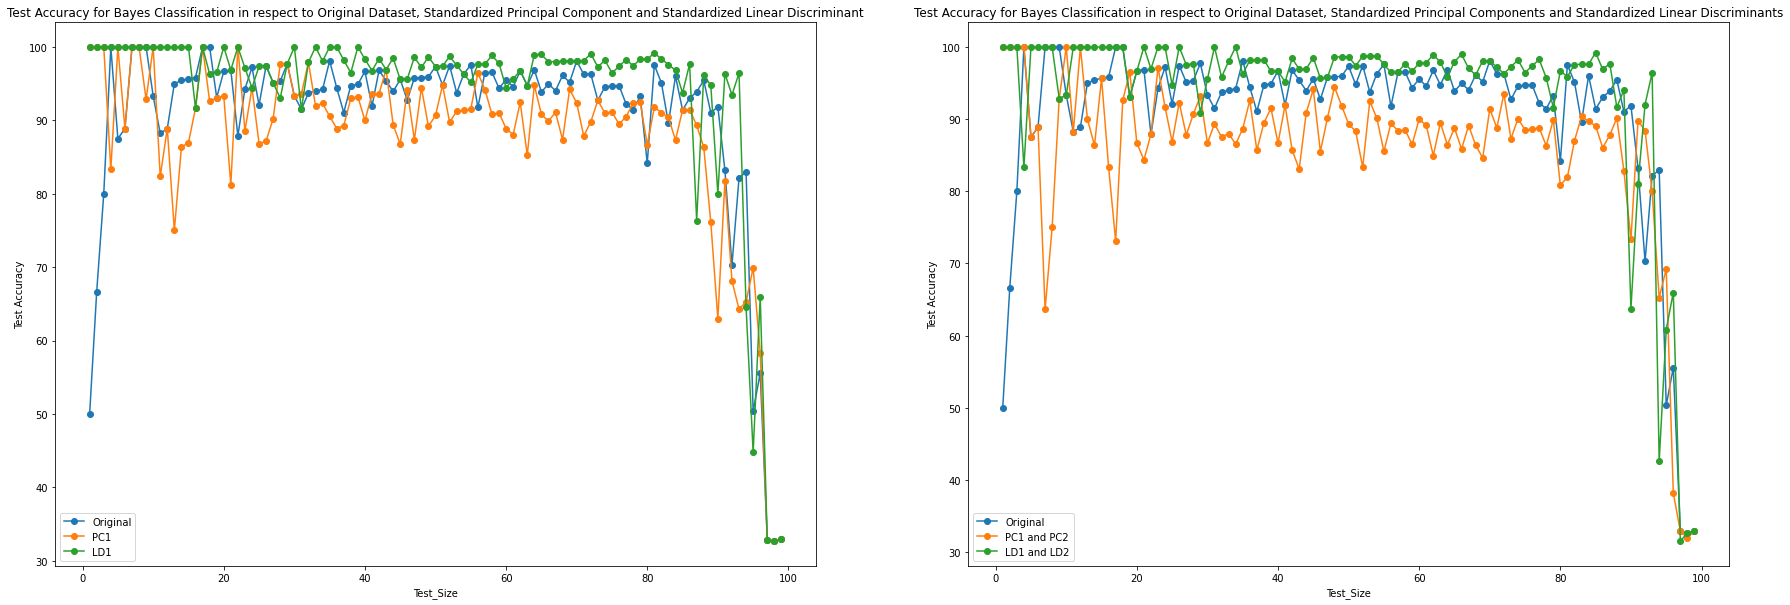

In [171]:
plt.figure(figsize = (30,10))

ax = plt.subplot(121)
plt.plot([i for i in range (1,100)],ga,marker='o')
plt.plot([i for i in range (1,100)],gap11,marker='o')
plt.plot([i for i in range (1,100)],gal11,marker='o')
plt.legend(labels = ['Original','PC1', 'LD1'])
plt.title('Test Accuracy for Bayes Classification in respect to Original Dataset, Standardized Principal Component and Standardized Linear Discriminant')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

bx = plt.subplot(122)
plt.plot([i for i in range (1,100)],ga,marker='o')
plt.plot([i for i in range (1,100)],gap12,marker='o')
plt.plot([i for i in range (1,100)],gal12,marker='o')
plt.legend(labels = ['Original','PC1 and PC2', 'LD1 and LD2'])
plt.title('Test Accuracy for Bayes Classification in respect to Original Dataset, Standardized Principal Components and Standardized Linear Discriminants')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

plt.show()

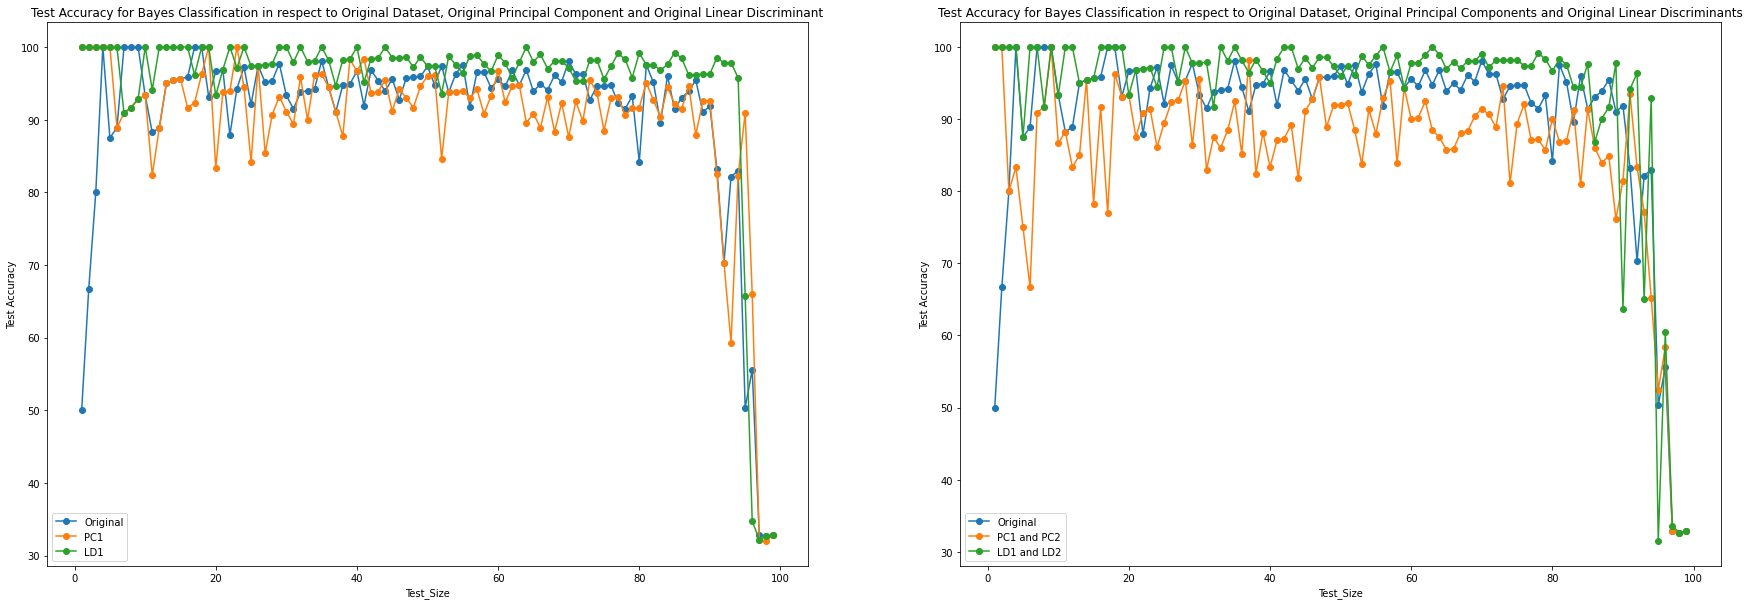

In [174]:
plt.figure(figsize = (30,10))

ax = plt.subplot(121)
plt.plot([i for i in range (1,100)],ga,marker='o')
plt.plot([i for i in range (1,100)],gap21,marker='o')
plt.plot([i for i in range (1,100)],gal21,marker='o')
plt.legend(labels = ['Original','PC1', 'LD1'])
plt.title('Test Accuracy for Bayes Classification in respect to Original Dataset, Original Principal Component and Original Linear Discriminant')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

bx = plt.subplot(122)
plt.plot([i for i in range (1,100)],ga,marker='o')
plt.plot([i for i in range (1,100)],gap22,marker='o')
plt.plot([i for i in range (1,100)],gal22,marker='o')
plt.legend(labels = ['Original','PC1 and PC2', 'LD1 and LD2'])
plt.title('Test Accuracy for Bayes Classification in respect to Original Dataset, Original Principal Components and Original Linear Discriminants')
plt.ylabel('Test Accuracy')
plt.xlabel('Test_Size')

plt.show()

# **The Importance of Feature Extraction**

### Original Dataset

In [116]:
fd = pd.read_csv('/content/diabetes.csv')
fd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
fd.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Standardized Dataset

In [118]:
ss = StandardScaler()
ss.fit(fd)
fd_ss = pd.DataFrame(ss.transform(fd),columns=fd.columns)
fd_ss

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


In [119]:
fd_ss.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16,2.408374e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.365896e+00


### Min-Maximized Dataset

In [120]:
mm = MinMaxScaler()
mm.fit(fd)
fd_mm = pd.DataFrame(mm.transform(fd),columns=fd.columns)
fd_mm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [121]:
fd_mm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Distributions of Features from Original, Standardized and Min-Maximised Datasets**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

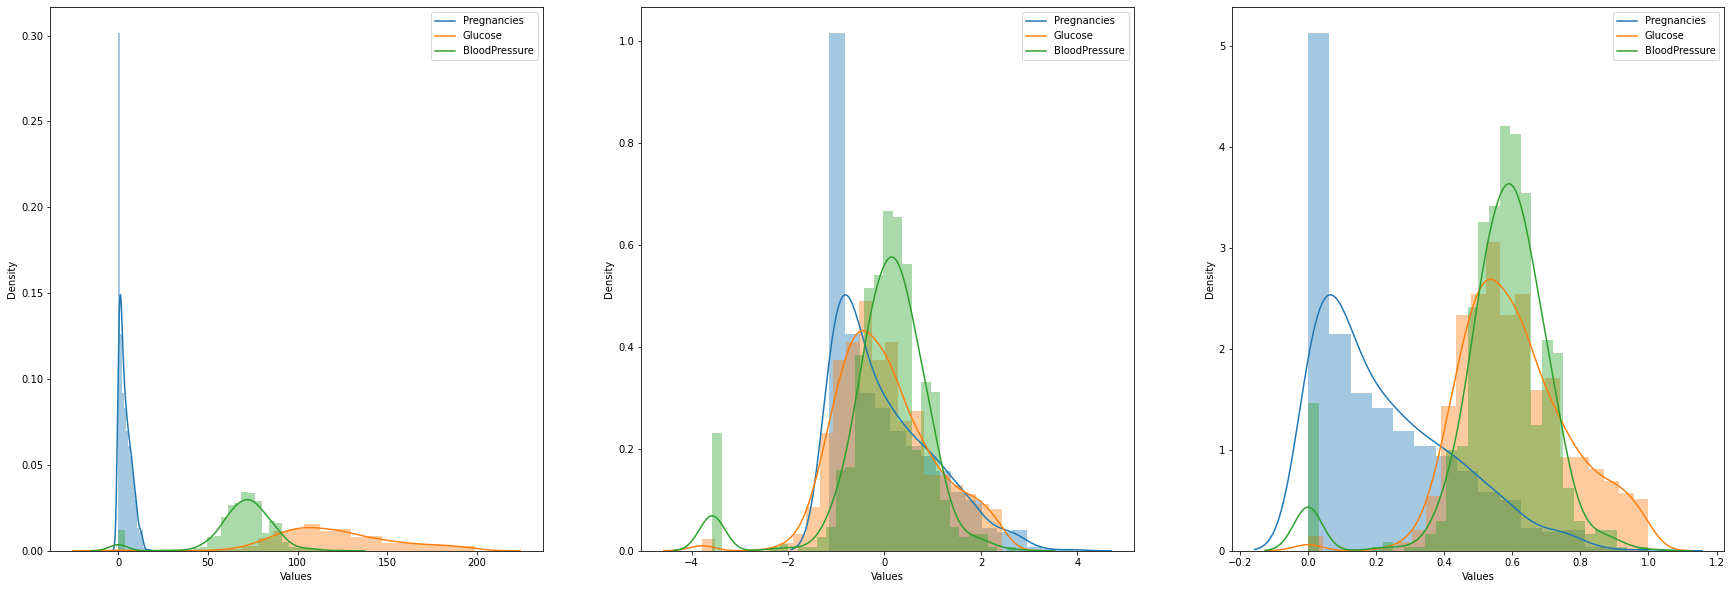

In [189]:
plt.figure(figsize = (30,10))

ax = plt.subplot(131)
sns.distplot(fd['Pregnancies'])
sns.distplot(fd['Glucose'])
sns.distplot(fd['BloodPressure'])
plt.legend(labels = ['Pregnancies','Glucose','BloodPressure'])
plt.xlabel('Values')


bx = plt.subplot(132)
sns.distplot(fd_ss['Pregnancies'])
sns.distplot(fd_ss['Glucose'])
sns.distplot(fd_ss['BloodPressure'])
plt.legend(labels = ['Pregnancies','Glucose','BloodPressure'])
plt.xlabel('Values')

cx = plt.subplot(133)

sns.distplot(fd_mm['Pregnancies'])
sns.distplot(fd_mm['Glucose'])
sns.distplot(fd_mm['BloodPressure'])
plt.legend(labels = ['Pregnancies','Glucose','BloodPressure'])
plt.xlabel('Values')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

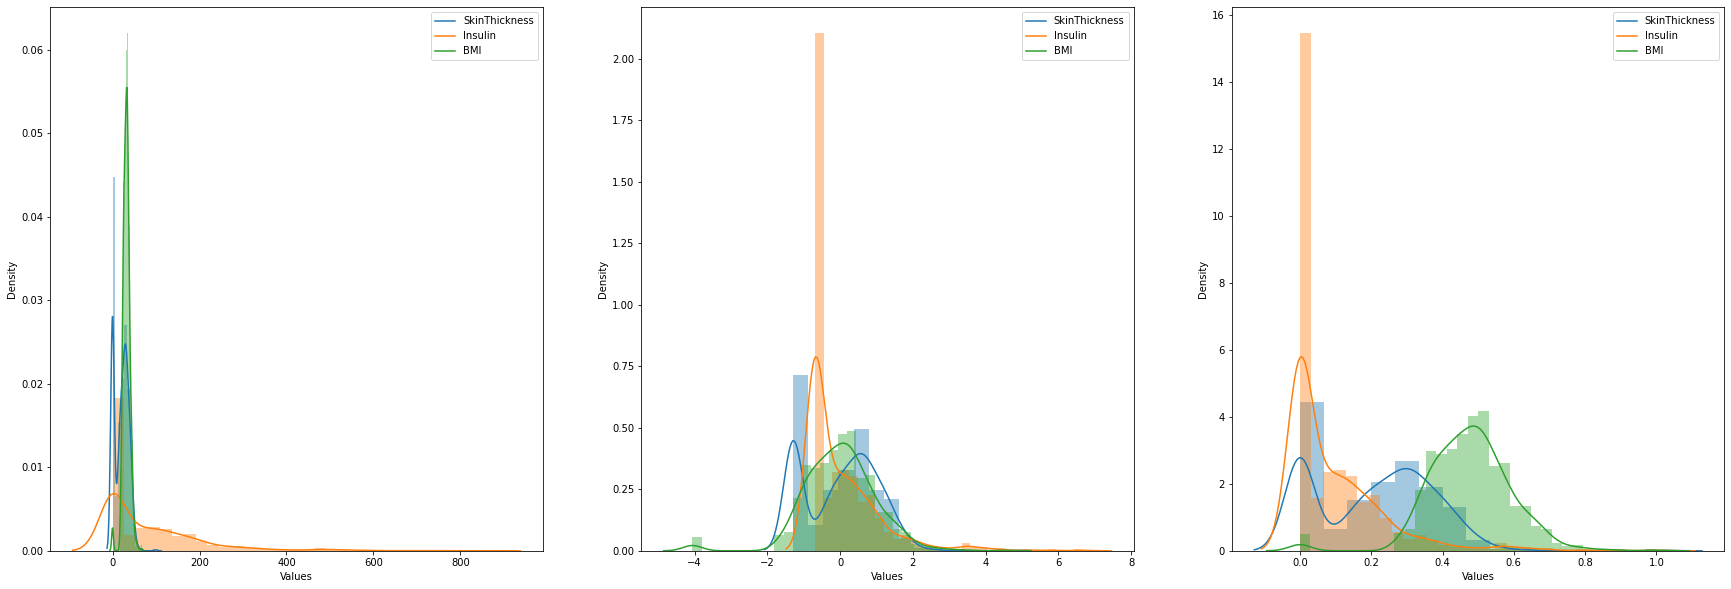

In [188]:
plt.figure(figsize = (30,10))

ax = plt.subplot(131)
sns.distplot(fd['SkinThickness'])
sns.distplot(fd['Insulin'])
sns.distplot(fd['BMI'])
plt.legend(labels = ['SkinThickness','Insulin','BMI'])
plt.xlabel('Values')

bx = plt.subplot(132)
sns.distplot(fd_ss['SkinThickness'])
sns.distplot(fd_ss['Insulin'])
sns.distplot(fd_ss['BMI'])
plt.legend(labels = ['SkinThickness','Insulin','BMI'])
plt.xlabel('Values')

cx = plt.subplot(133)
sns.distplot(fd_mm['SkinThickness'])
sns.distplot(fd_mm['Insulin'])
sns.distplot(fd_mm['BMI'])
plt.legend(labels = ['SkinThickness','Insulin','BMI'])
plt.xlabel('Values')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

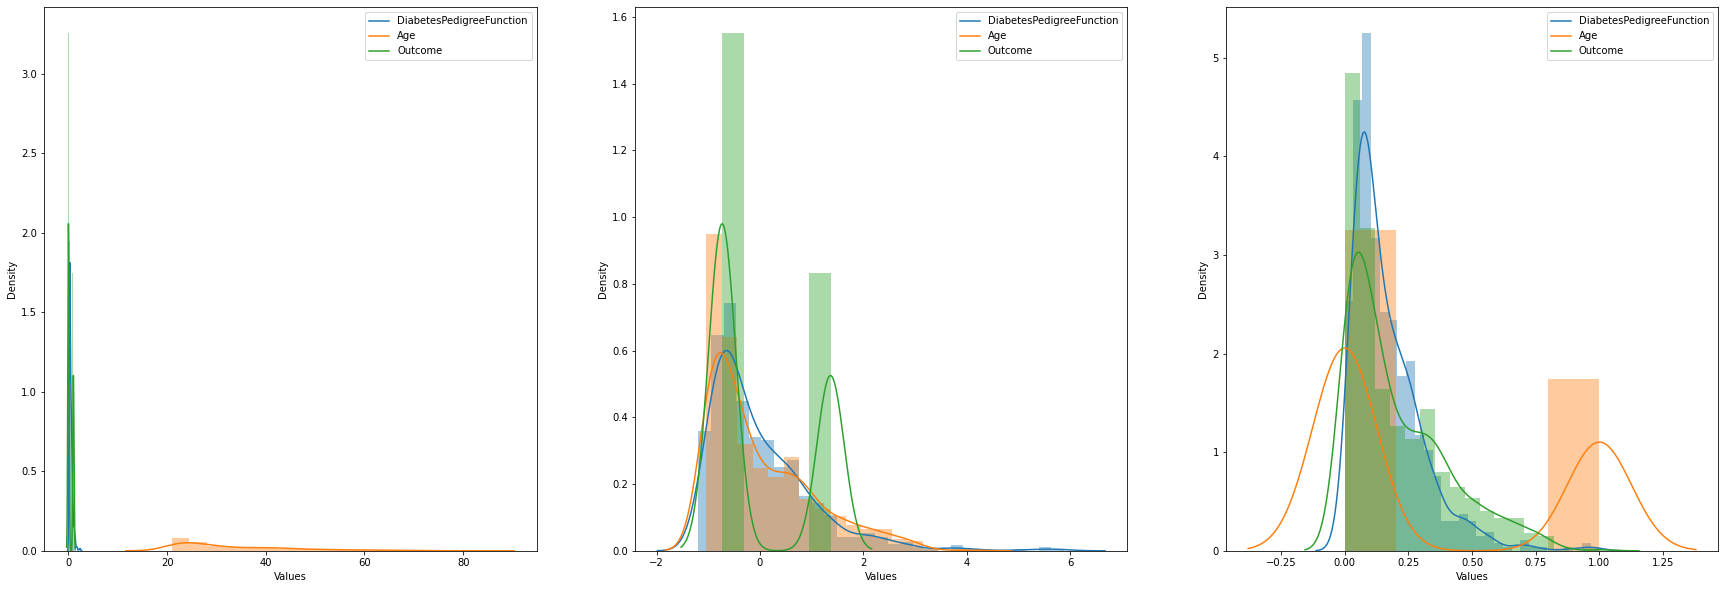

In [187]:
plt.figure(figsize = (30,10))

ax = plt.subplot(131)
sns.distplot(fd['DiabetesPedigreeFunction'])
sns.distplot(fd['Age'])
sns.distplot(fd['Outcome'])
plt.legend(labels = ['DiabetesPedigreeFunction','Age','Outcome'])
plt.xlabel('Values')

bx = plt.subplot(132)
sns.distplot(fd_ss['DiabetesPedigreeFunction'])
sns.distplot(fd_ss['Age'])
sns.distplot(fd_ss['Outcome'])
plt.legend(labels = ['DiabetesPedigreeFunction','Age','Outcome'])
plt.xlabel('Values')

cx = plt.subplot(133)
sns.distplot(fd_mm['DiabetesPedigreeFunction'])
sns.distplot(fd_mm['Outcome'])
sns.distplot(fd_mm['Age'])
plt.legend(labels = ['DiabetesPedigreeFunction','Age','Outcome'])
plt.xlabel('Values')

plt.show()

# **Feature Extraction for Polynomial-kernelized Support Vector Machine**

In [125]:
X = fd.iloc[:,:-1]
X_ss = fd_ss.iloc[:,:-1]
X_mm = fd_mm.iloc[:,:-1]

Y = fd.iloc[:,-1]
Y_ss = fd_ss.iloc[:,-1].astype('int')
Y_mm = fd_mm.iloc[:,-1]

In [126]:
s_p = SVC(kernel='poly',degree=2)

In [127]:
s1f = sfs(s_p,forward=True,k_features =5,n_jobs=-1)
s1f.fit(X,Y)
best_ff1 = list(s1f.k_feature_names_)

s2f = sfs(s_p,forward=True,k_features =5,n_jobs=-1)
s2f.fit(X_ss,Y_ss)
best_ff2 = list(s2f.k_feature_names_)

s3f = sfs(s_p,forward=True,k_features =5,n_jobs=-1)
s3f.fit(X_mm,Y_mm)
best_ff3 = list(s3f.k_feature_names_)

In [190]:
print(best_ff1)
print(best_ff2)
print(best_ff3)

['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI']
['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [128]:
s1e = efs(s_p,max_features=5,n_jobs=-1)
s1e.fit(X,Y)
best_ef1 = list(s1e.best_feature_names_)

s2e = efs(s_p,max_features=5,n_jobs=-1)
s2e.fit(X_ss,Y_ss)
best_ef2 = list(s2e.best_feature_names_)

s3e = efs(s_p,max_features=5,n_jobs=-1)
s3e.fit(X_mm,Y_mm)
best_ef3 = list(s3e.best_feature_names_)

Features: 218/218

In [191]:
print(best_ef1)
print(best_ef2)
print(best_ef3)

['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI']
['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']
['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']


In [129]:
xtr,xte,ytr,yte = train_test_split(X,Y,test_size = 0.3)
xtrs,xtes,ytrs,ytes = train_test_split(X_ss,Y_ss,test_size = 0.3)
xtrm,xtem,ytrm,ytem = train_test_split(X_mm,Y_mm,test_size = 0.3)

In [130]:
refo = SVC(kernel='poly',degree=2)
refs = SVC(kernel='poly',degree=2)
refm = SVC(kernel='poly',degree=2)

o_f = SVC(kernel = 'poly',degree=2)
o_e = SVC(kernel = 'poly',degree=2)

s_f = SVC(kernel = 'poly',degree=2)
s_e = SVC(kernel = 'poly',degree=2)

m_f = SVC(kernel = 'poly',degree=2)
m_e = SVC(kernel = 'poly',degree=2)

In [131]:
refo.fit(xtr,ytr)
refs.fit(xtrs,ytrs)
refm.fit(xtrm,ytrm)

o_f.fit(xtr[best_ff1],ytr)
o_e.fit(xtr[best_ef1],ytr)

s_f.fit(xtrs[best_ff2],ytrs)
s_e.fit(xtrs[best_ef2],ytrs)

m_f.fit(xtrm[best_ff3],ytrm)
m_e.fit(xtrm[best_ef3],ytrm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
ros = refo.score(xte,yte)
rss = refs.score(xtes,ytes)
rms = refm.score(xtem,ytem)

ofs = o_f.score(xte[best_ff1],yte)
oes = o_e.score(xte[best_ef1],yte)

sfs = s_f.score(xtes[best_ff2],ytes)
ses = s_e.score(xtes[best_ef2],ytes)

mfs = m_f.score(xtem[best_ff3],ytem)
mes = m_e.score(xtem[best_ef3],ytem)

In [133]:
rof = f1_score(yte,refo.predict(xte))
rsf = f1_score(ytes,refs.predict(xtes))
rmf = f1_score(ytem,refm.predict(xtem))

off = f1_score(yte,o_f.predict(xte[best_ff1]))
oef = f1_score(yte,o_e.predict(xte[best_ef1]))

sff = f1_score(ytes,s_f.predict(xte[best_ff2]))
sef = f1_score(ytes,s_e.predict(xte[best_ef2]))

mff = f1_score(ytem,m_f.predict(xte[best_ff3]))
mef = f1_score(ytem,m_e.predict(xte[best_ef3]))

In [134]:
print("Accuracy of Polynomial SVM on Original Dataset = "+str(ros*100)+" %")
print("F1-Score of Polynomial SVM on Original Dataset = "+str(rof))

Accuracy of Polynomial SVM on Original Dataset = 70.995670995671 %
F1-Score of Polynomial SVM on Original Dataset = 0.5179856115107914


In [135]:
print("Accuracy of Polynomial SVM on Original Dataset with Forward Feature Selection = "+str(ofs*100)+" %")
print("F1-Score of Polynomial SVM on Original Dataset with Forward Feature Selection = "+str(off))

Accuracy of Polynomial SVM on Original Dataset with Forward Feature Selection = 70.56277056277057 %
F1-Score of Polynomial SVM on Original Dataset with Forward Feature Selection = 0.5072463768115942


In [136]:
print("Accuracy of Polynomial SVM on Original Dataset with Exhaustive Feature Selection = "+str(oes*100)+" %")
print("F1-Score of Polynomial SVM on Original Dataset with Exhaustive Feature Selection = "+str(oef))

Accuracy of Polynomial SVM on Original Dataset with Exhaustive Feature Selection = 70.56277056277057 %
F1-Score of Polynomial SVM on Original Dataset with Exhaustive Feature Selection = 0.5072463768115942


In [137]:
print("Accuracy of Polynomial SVM on Standardized Dataset = "+str(rss*100)+" %")
print("F1-Score of Polynomial SVM on Standardized Dataset = "+str(rsf))

Accuracy of Polynomial SVM on Standardized Dataset = 67.53246753246754 %
F1-Score of Polynomial SVM on Standardized Dataset = 0.39024390243902435


In [138]:
print("Accuracy of Polynomial SVM on Standardized Dataset with Forward Feature Selection = "+str(sfs*100)+" %")
print("F1-Score of Polynomial SVM on Standardized Dataset with Forward Feature Selection = "+str(sff))

Accuracy of Polynomial SVM on Standardized Dataset with Forward Feature Selection = 67.09956709956711 %
F1-Score of Polynomial SVM on Standardized Dataset with Forward Feature Selection = 0.5209003215434084


In [139]:
print("Accuracy of Polynomial SVM on Standardized Dataset with Exhaustive Feature Selection = "+str(ses*100)+" %")
print("F1-Score of Polynomial SVM on Standardized Dataset with Exhaustive Feature Selection = "+str(sef))

Accuracy of Polynomial SVM on Standardized Dataset with Exhaustive Feature Selection = 70.56277056277057 %
F1-Score of Polynomial SVM on Standardized Dataset with Exhaustive Feature Selection = 0.5239616613418531


In [140]:
print("Accuracy of Polynomial SVM on Min-Maximised Dataset = "+str(rms*100)+" %")
print("F1-Score of Polynomial SVM on Min-Maximised Dataset = "+str(rmf))

Accuracy of Polynomial SVM on Min-Maximised Dataset = 77.48917748917748 %
F1-Score of Polynomial SVM on Min-Maximised Dataset = 0.59375


In [141]:
print("Accuracy of Polynomial SVM on Min-Maximised Dataset with Forward Feature Selection = "+str(mfs*100)+" %")
print("F1-Score of Polynomial SVM on Min-Maximised Dataset with Forward Feature Selection = "+str(mff))

Accuracy of Polynomial SVM on Min-Maximised Dataset with Forward Feature Selection = 79.65367965367966 %
F1-Score of Polynomial SVM on Min-Maximised Dataset with Forward Feature Selection = 0.48026315789473684


In [142]:
print("Accuracy of Polynomial SVM on Min-Maximised Dataset with Exhaustive Feature Selection = "+str(mes*100)+" %")
print("F1-Score of Polynomial SVM on Min-Maximised Dataset with Exhaustive Feature Selection = "+str(mef))

Accuracy of Polynomial SVM on Min-Maximised Dataset with Exhaustive Feature Selection = 78.35497835497836 %
F1-Score of Polynomial SVM on Min-Maximised Dataset with Exhaustive Feature Selection = 0.48026315789473684


# **Pearson Correlation with threshold of 70%**

In [143]:
fd1 = X.corr(method='pearson')
fd2 = X_ss.corr(method='pearson')
fd3 = X_mm.corr(method='pearson')
original = []
standard = []
minmax = []

In [144]:
fd1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [145]:
fd2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [146]:
fd3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [147]:
for i in fd1.columns:
  idx = fd1[fd1[i]>=0.7][i].index
  original.append(str(i)+"<------->"+str(idx))

for j in fd2.columns:
  idx = fd2[fd2[j]>=0.7][j].index
  standard.append(str(j)+"<------->"+str(idx))

for k in fd3.columns:
  idx = fd3[fd3[k]>=0.7][k].index
  minmax.append(str(k)+"<------->"+str(idx))

In [148]:
for o in original:
  print(o)

Pregnancies<------->Index(['Pregnancies'], dtype='object')
Glucose<------->Index(['Glucose'], dtype='object')
BloodPressure<------->Index(['BloodPressure'], dtype='object')
SkinThickness<------->Index(['SkinThickness'], dtype='object')
Insulin<------->Index(['Insulin'], dtype='object')
BMI<------->Index(['BMI'], dtype='object')
DiabetesPedigreeFunction<------->Index(['DiabetesPedigreeFunction'], dtype='object')
Age<------->Index(['Age'], dtype='object')


In [149]:
for s in standard:
  print(s)

Pregnancies<------->Index(['Pregnancies'], dtype='object')
Glucose<------->Index(['Glucose'], dtype='object')
BloodPressure<------->Index(['BloodPressure'], dtype='object')
SkinThickness<------->Index(['SkinThickness'], dtype='object')
Insulin<------->Index(['Insulin'], dtype='object')
BMI<------->Index(['BMI'], dtype='object')
DiabetesPedigreeFunction<------->Index(['DiabetesPedigreeFunction'], dtype='object')
Age<------->Index(['Age'], dtype='object')


In [150]:
for m in minmax:
  print(m)

Pregnancies<------->Index(['Pregnancies'], dtype='object')
Glucose<------->Index(['Glucose'], dtype='object')
BloodPressure<------->Index(['BloodPressure'], dtype='object')
SkinThickness<------->Index(['SkinThickness'], dtype='object')
Insulin<------->Index(['Insulin'], dtype='object')
BMI<------->Index(['BMI'], dtype='object')
DiabetesPedigreeFunction<------->Index(['DiabetesPedigreeFunction'], dtype='object')
Age<------->Index(['Age'], dtype='object')
